<a href="https://colab.research.google.com/github/imran201khan/MachineLearning-from-Basic-/blob/main/Outlier_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')


In [21]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [23]:
df.shape

(1000, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


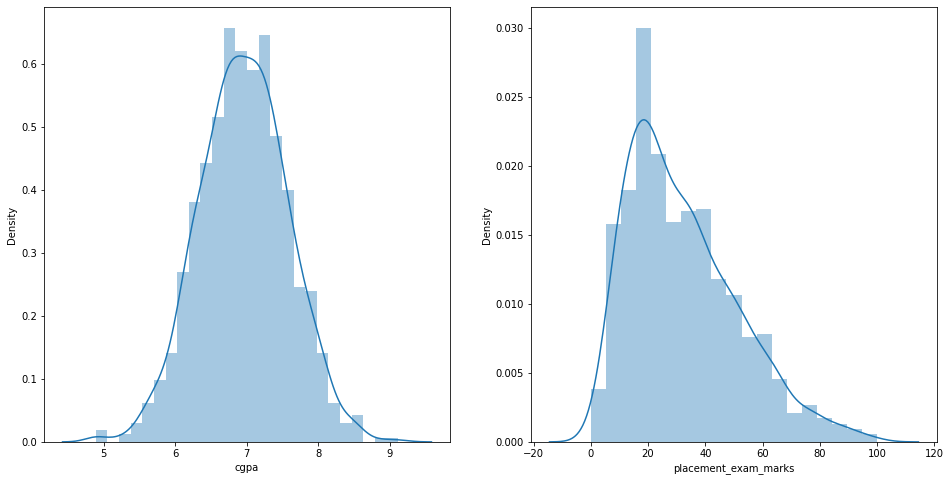

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [35]:
print("Mean value of cgpa ",df['cgpa'].mean())
print('std value of cgpa ',df['cgpa'].std())
print('maximum value of cgpa ',df['cgpa'].max())
print('minimum value of cgpa ',df['cgpa'].min())

Mean value of cgpa  6.96124000000001
std value of cgpa  0.6158978751323894
maximum value of cgpa  9.12
minimum value of cgpa  4.89


In [36]:
print("Mean value of 'placement_exam_marks' ",df['placement_exam_marks'].mean())
print("std value of 'placement_exam_marks'",df['placement_exam_marks'].std())
print("maximum value of 'placement_exam_marks' ",df['placement_exam_marks'].max())
print("minimum value of 'placement_exam_marks' ",df['placement_exam_marks'].min())

Mean value of 'placement_exam_marks'  32.225
std value of 'placement_exam_marks' 19.13082233892108
maximum value of 'placement_exam_marks'  100.0
minimum value of 'placement_exam_marks'  0.0


In [37]:
#find boundery value
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397177
lowest allowed 5.113546374602842


In [42]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [48]:
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]

In [49]:
new_df.shape

(995, 3)

In [57]:
#approch 2
#calculate z-score
df['z-score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [58]:
df.sample(5)

,cgpa,placement_exam_marks,placed,z-score
680,7.35,15.0,0,0.631209
878,6.98,34.0,0,0.030460
536,6.87,48.0,1,-0.148141
934,7.15,9.0,0,0.306479
770,7.33,67.0,1,0.598736


In [59]:
df[df['z-score']>3]

,cgpa,placement_exam_marks,placed,z-score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [61]:
df[df['z-score']<-3]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [63]:
df[(df['z-score']>3) | (df['z-score']<-3)]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [66]:
new_df=df[(df['z-score']<3) & (df['z-score']>-3)]

In [67]:
new_df

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [68]:
#capping
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [69]:
df['cgpa']=np.where(df['cgpa']> upper_limit, upper_limit,
                    np.where(
                        df['cgpa']<lower_limit,lower_limit
                    ,df['cgpa'])
                    )

In [74]:
upper_limit

8.808933625397177

In [73]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64